In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from datapreprocessing import df_final
import numpy as np
import seaborn as sn

Index(['Unnamed: 0', 'Unnamed: 1', 'Moins de 20 ans', 'Moins de 25 ans',
       '25 à 64 ans', '65 ans ou plus', '75 ans ou plus', '80 ans ou plus',
       '85 ans ou plus', 'Unnamed: 9', 'Moins de 20 ans.1',
       'Moins de 25 ans.1', '25 à 64 ans.1', '65 ans ou plus.1',
       '75 ans ou plus.1', '80 ans ou plus.1', '85 ans ou plus.1',
       'Unnamed: 17'],
      dtype='object')


In [ ]:
df_final.shape

In [5]:
#on garde les colonnes relativement au nombre de population
df_final["nb_etab_sante_par_hab"] = df_final["nb_etab_sante"]/df_final["pop_totale"]

df_final_corr = df_final[['nom_dep',
 'Moins de 20 ans.1',
 'Moins de 25 ans.1',
 '25 à 64 ans.1',
 '65 ans ou plus.1',
 '75 ans ou plus.1',
 '80 ans ou plus.1',
 '85 ans ou plus.1',
 'nb hospitalisations',
 'nb deces',
 'espérance de vie',
 'passage_urg_corona',
 'nb_etab_sante',
 'nb_etab_sante_par_hab',
 'esp_de_vie_H_60',
 'esp_de_vie_F_60',
 'esp_de_vie_H_65',
 'esp_de_vie_F_65',
 'rapport nv_vie interdécile D9/D1',
 'indicateur pauvreté 1',
 'indicateur pauvreté 2',
 "ratio patients positifs/population",
 'ratio patients positifs/testés',
 'ratio patients testés/population']]

Matrice de corrélation des variables

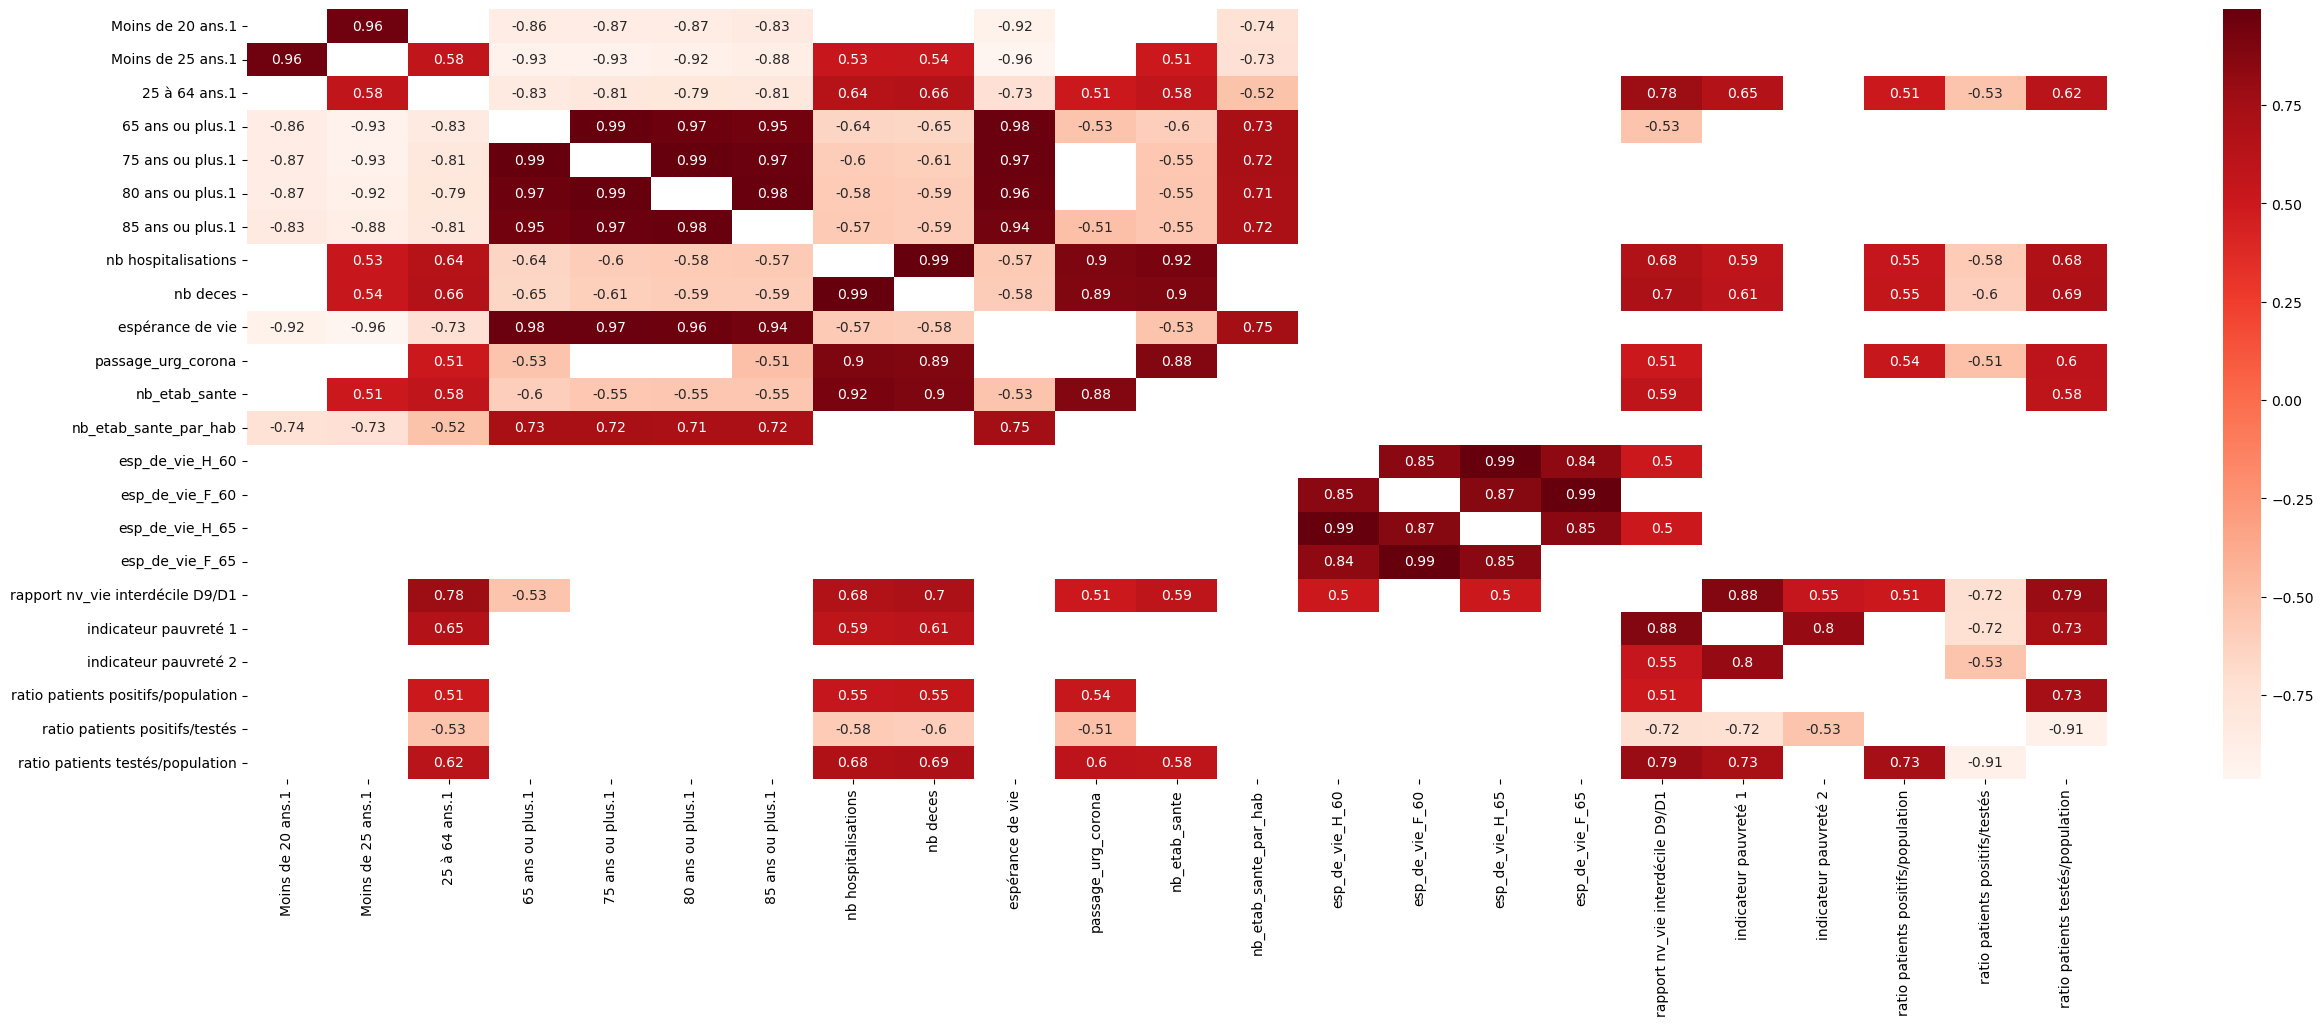

In [ ]:
dfCorr = df_final_corr.corr(method="pearson", numeric_only=True)
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sn.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()


# corrélation entre nb établissements de santé et taux de dépistage mais pas entre nb établissements de santé/habitant
# et ce même taux


<Axes: xlabel='ratio patients testés/population', ylabel='indicateur pauvreté 1'>

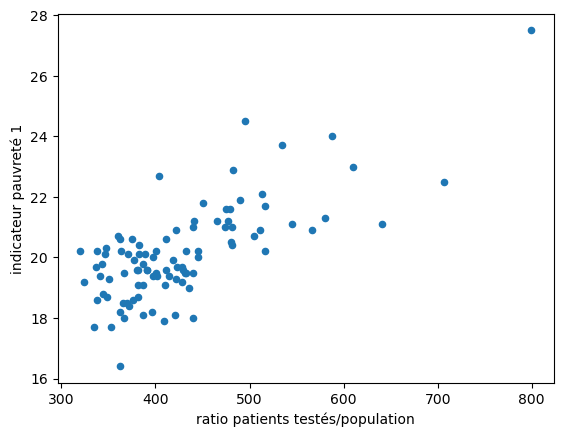

In [10]:
df_final.plot.scatter(x="ratio patients testés/population", 
y = "indicateur pauvreté 1")


Les départements ayant une plus grande part de population pauvre est corrélée à un plus grand nombre de décès liés au covid. Cela est peut-être dû au fait que les personnes plus pauvres sont plus susceptibles d'avoir des maladies qui se seraient accumulées avec le covid.
ref : https://www.inegalites.fr/Les-plus-pauvres-sont-plus-concernes-par-les-maladies-graves-de-longue-duree


<Axes: xlabel='nb deces', ylabel='indicateur pauvreté 1'>

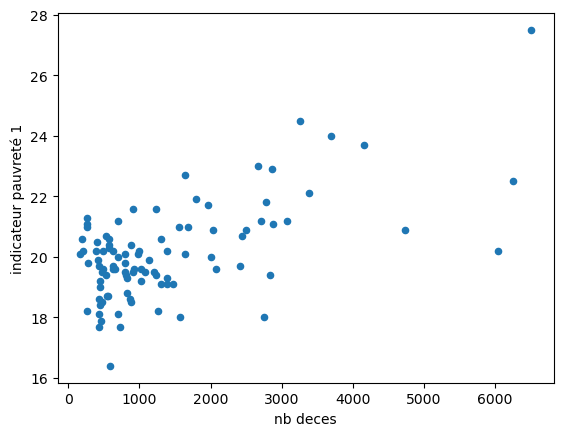

In [8]:
df_final.plot.scatter(x="nb deces", 
y = "indicateur pauvreté 1")
